In [6]:
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img
from sklearn.decomposition import PCA
import numpy as np
import os
from numpy.linalg import eig

images = []
for filename in os.listdir('./Train1'):
    if filename.endswith('.jpg'):
        image = img.imread('./Train1/'+filename)
        images.append(np.array(image).flatten())
np_image = np.array(images)



0.9002179198267616


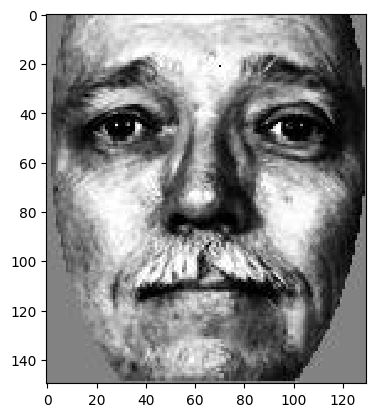

In [7]:
# Implement PCA to represent faces onto a lower dimensional space and solidify appropriate number of basis vectors. 

# store first image for future use
first_image = img.imread('./Train1/00001fa010.930831.jpg')

# perform principle component analysis
pca = PCA(n_components=265)
X_pca = pca.fit_transform(np_image)
var = pca.explained_variance_ratio_
print(sum(var)) 
# sum of variance ratio of first **265 features** equals 90.02%

# displays the first image in grayscale if loaded properly
if len(np_image) > 0:
    plt.imshow(np_image[0].reshape(image.shape), interpolation='nearest')
    plt.gray() 
    plt.show()
else:
    print("No images loaded.")


In [8]:
# Displaying the top 10 eigenfaces inside of results/eigenfaces

results_dir = 'results/eigenfaces'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

eigenfaces = pca.components_.reshape((265, first_image.shape[0], first_image.shape[1]))

for i in range(10):
    plt.figure()
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.savefig(os.path.join(results_dir, f'eigenface_{i+1}.png'))
    plt.close()

In [9]:
# Display first 10 faces represented as a linear combination of the 265 eigenvectors and comparing with original
# Results contained in results/tranfromed images

results_dir = 'results/transformed_images'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# reconstructs the original data as closely as possible from the reduced-dimensional space
reconstructed_images = pca.inverse_transform(X_pca) 
reconstructed_images_reshaped = reconstructed_images.reshape(-1, first_image.shape[0], first_image.shape[1])

# display first 10 eigenfaces
samples_to_display = [num for num in range(10)]

for i, sample in enumerate(samples_to_display):
    fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

    original_image = np_image[sample].reshape(first_image.shape[0], first_image.shape[1])
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title(f'Original Image {sample + 1}')
    axes[0].axis('off')
    
    reconstructed_image = reconstructed_images_reshaped[sample]
    axes[1].imshow(reconstructed_image, cmap='gray')
    axes[1].set_title(f'Reconstructed Image {sample + 1}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f'comparison_{sample + 1}.png'))
    plt.close(fig)

In [10]:
# Performance of facial recognition in the lower dimensional space on all test images.

results_dir = 'results/facial_recognition'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

j = 1
for filename in os.listdir('./Test1'):
    
    # projecting the test image to the Eigen vector space before finding its match
    test_image_flat = img.imread(os.path.join('./Test1', filename)).flatten()
    test_image_pca = pca.transform(test_image_flat.reshape(1, -1))

    # Compute eucleadian distances between test image and all training images in pca
    distances = np.sqrt(((X_pca - test_image_pca) ** 2).sum(axis=1))

    # Get the indices of the smallest distances and select top 5 matches
    closest_indices = np.argsort(distances)
    top_5_indices = closest_indices[:5]

    # display test images along with top 5 matches
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))

    test_image_reshaped = test_image_flat.reshape(first_image.shape[0], first_image.shape[1])
    axes[0].imshow(test_image_reshaped, cmap='gray')
    axes[0].set_title(f'Test Image {j}')
    axes[0].axis('off')

    for i, index in enumerate(top_5_indices):
        matched_image = np_image[index].reshape(first_image.shape[0], first_image.shape[1])
        axes[i+1].imshow(matched_image, cmap='gray')
        if i != 0:
            axes[i+1].set_title(f'Match {i+1}')
        else:
            axes[i+1].set_title('Best Match')
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f'facial_recognition_{j}.png'))
    plt.close(fig)

    j += 1